# [第3章: 正規表現](https://nlp100.github.io/ja/ch03.html)
Wikipediaの記事を以下のフォーマットで書き出したファイル[jawiki-country.json.gz](https://nlp100.github.io/data/jawiki-country.json.gz)がある．
* 1行に1記事の情報がJSON形式で格納される
* 各行には記事名が"title"キーに，記事本文が"text"キーの辞書オブジェクトに格納され，そのオブジェクトがJSON形式で書き出される
* ファイル全体はgzipで圧縮される

以下の処理を行うプログラムを作成せよ．

In [1]:
!ls Input/jawiki-country.json.gz

Input/jawiki-country.json.gz


## [20. JSONデータの読み込み](https://nlp100.github.io/ja/ch03.html#20-json%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E8%AA%AD%E3%81%BF%E8%BE%BC%E3%81%BF)
Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [2]:
import gzip
import json

In [3]:
uk_lines = None

with gzip.open("Input/jawiki-country.json.gz", mode="rt") as countries_json:
    for country_json in countries_json:
        country = json.loads(country_json)
        if country["title"] == "イギリス":
            uk_lines = country["text"].split("\n")
            break

In [4]:
uk_lines[:20]

['{{redirect|UK}}',
 '{{redirect|英国|春秋時代の諸侯国|英 (春秋)}}',
 '{{Otheruses|ヨーロッパの国|長崎県・熊本県の郷土料理|いぎりす}}',
 '{{基礎情報 国',
 '|略名  =イギリス',
 '|日本語国名 = グレートブリテン及び北アイルランド連合王国',
 '|公式国名 = {{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />',
 '*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）',
 '*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）',
 '*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）',
 '*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）',
 '*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）',
 '**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '|国旗画像 = Flag of the United Kingdom.svg',
 '|国章画像 = [[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '|国章リンク =（[[イギリスの国章|国章]]）

## [21. カテゴリ名を含む行を抽出](https://nlp100.github.io/ja/ch03.html#21-%E3%82%AB%E3%83%86%E3%82%B4%E3%83%AA%E5%90%8D%E3%82%92%E5%90%AB%E3%82%80%E8%A1%8C%E3%82%92%E6%8A%BD%E5%87%BA)
記事中でカテゴリ名を宣言している行を抽出せよ．

In [5]:
uk_category_lines = []

for uk_line in uk_lines:
    if uk_line[:11] == "[[Category:":
        uk_category_lines.append(uk_line)

In [6]:
uk_category_lines

['[[Category:イギリス|*]]',
 '[[Category:イギリス連邦加盟国]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国|元]]',
 '[[Category:海洋国家]]',
 '[[Category:現存する君主国]]',
 '[[Category:島国]]',
 '[[Category:1801年に成立した国家・領域]]']

## [22. カテゴリ名の抽出](https://nlp100.github.io/ja/ch03.html#22-%E3%82%AB%E3%83%86%E3%82%B4%E3%83%AA%E5%90%8D%E3%81%AE%E6%8A%BD%E5%87%BA)
記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [7]:
import re

In [8]:
uk_categories = []

for uk_category_line in uk_category_lines:
    match = re.search(r"\[\[Category:(.*)\]\]", uk_category_line)
    uk_categories.append(re.sub(r"\|.*", "", match.group(1)))

In [9]:
uk_categories

['イギリス',
 'イギリス連邦加盟国',
 '英連邦王国',
 'G8加盟国',
 '欧州連合加盟国',
 '海洋国家',
 '現存する君主国',
 '島国',
 '1801年に成立した国家・領域']

## [23. セクション構造](https://nlp100.github.io/ja/ch03.html#23-%E3%82%BB%E3%82%AF%E3%82%B7%E3%83%A7%E3%83%B3%E6%A7%8B%E9%80%A0)
記事中に含まれるセクション名とそのレベル（例えば"== セクション名 =="なら1）を表示せよ．

In [10]:
def det_section_level(inner_str: str, level: int):
    match = re.search("=(.*)=", inner_str)
    if match is None:
        return inner_str, level
    else:
        return det_section_level(match.group(1), level+1)

In [11]:
uk_sections = {}

for uk_line in uk_lines:
    match = re.search("==(.*)==", uk_line)
    if match is not None:
        section, level = det_section_level(match.group(1), 1)
        uk_sections[section.strip()] = level

In [12]:
uk_sections

{'国名': 1,
 '歴史': 1,
 '地理': 1,
 '主要都市': 2,
 '気候': 2,
 '政治': 1,
 '元首': 2,
 '法': 2,
 '内政': 2,
 '地方行政区分': 2,
 '外交・軍事': 2,
 '経済': 1,
 '鉱業': 2,
 '農業': 2,
 '貿易': 2,
 '不動産': 2,
 'エネルギー政策': 2,
 '通貨': 2,
 '企業': 2,
 '通信': 3,
 '交通': 1,
 '道路': 2,
 '鉄道': 2,
 '海運': 2,
 '航空': 2,
 '科学技術': 1,
 '国民': 1,
 '言語': 2,
 '宗教': 2,
 '婚姻': 2,
 '移住': 2,
 '教育': 2,
 '医療': 2,
 '文化': 1,
 '食文化': 2,
 '文学': 2,
 '哲学': 2,
 '音楽': 2,
 'ポピュラー音楽': 3,
 '映画': 2,
 'コメディ': 2,
 '国花': 2,
 '世界遺産': 2,
 '祝祭日': 2,
 'スポーツ': 2,
 'サッカー': 3,
 'クリケット': 3,
 '競馬': 3,
 'モータースポーツ': 3,
 '野球': 3,
 'カーリング': 3,
 '自転車競技': 3,
 '脚注': 1,
 '関連項目': 1,
 '外部リンク': 1}

## [24. ファイル参照の抽出](https://nlp100.github.io/ja/ch03.html#24-%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E5%8F%82%E7%85%A7%E3%81%AE%E6%8A%BD%E5%87%BA)
記事から参照されているメディアファイルをすべて抜き出せ．

In [13]:
for uk_line in uk_lines:
    match = re.search(r"\[\[ファイル:(.*)\|thumb\|.*", uk_line)
    if match is not None:
        print(match.group(1))

Descriptio Prime Tabulae Europae.jpg
Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg
London.bankofengland.arp.jpg
Battle of Waterloo 1815.PNG
Uk topo en.jpg
BenNevis2005.jpg
Population density UK 2011 census.png
Palace of Westminster, London - Feb 2007.jpg
Scotland Parliament Holyrood.jpg
Donald Trump and Theresa May (33998675310) (cropped).jpg
Soldiers Trooping the Colour, 16th June 2007.jpg
City of London skyline from London City Hall - Oct 2008.jpg
Oil platform in the North SeaPros.jpg
Eurostar at St Pancras Jan 2008.jpg
Heathrow Terminal 5C Iwelumo-1.jpg|thumb|[[:en:London Heathrow Terminal 5|London Heathrow Terminal 5]]. [[ロンドン・ヒースロー空港]]は[[:en:World's busiest airports by international passenger traffic|国際線利用客数]]では世界随一である。]][[ファイル:Airbus A380-841 G-XLEB British Airways (10424102995).jpg
UKpop.svg
Anglospeak.svg
Royal Aberdeen Children's Hospital.jpg
CHANDOS3.jpg
The Fabs.JPG
Wembley Stadium, illuminated.jpg


## [25. テンプレートの抽出](https://nlp100.github.io/ja/ch03.html#25-%E3%83%86%E3%83%B3%E3%83%97%E3%83%AC%E3%83%BC%E3%83%88%E3%81%AE%E6%8A%BD%E5%87%BA)
記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．

In [14]:
uk_basic_infos_25 = {}

is_started = False
key = None
for uk_line in uk_lines:
    if uk_line == "{{基礎情報 国":
        # Start
        is_started = True
        continue
    elif is_started == False:
        continue
    elif uk_line == "}}":
        # Finish
        break

    if uk_line[0] == "|":
        key, value = re.search(r"\|(.*?)=(.*)", uk_line).group(1, 2)
        key, value = key.strip(), value.strip()
        uk_basic_infos_25[key] = value
    else:
        uk_basic_infos_25[key] += uk_line

In [15]:
uk_basic_infos_25

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）',
 '国歌': "[[女王陛下万歳|{{lang|en|God Save the Queen}}]]

## [26. 強調マークアップの除去](https://nlp100.github.io/ja/ch03.html#26-%E5%BC%B7%E8%AA%BF%E3%83%9E%E3%83%BC%E3%82%AF%E3%82%A2%E3%83%83%E3%83%97%E3%81%AE%E9%99%A4%E5%8E%BB)
25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: [マークアップ早見表](http://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8)）．

In [16]:
uk_basic_infos_26 = {}

for key, value in uk_basic_infos_25.items():
    tmp = value
    tmp = re.sub(r"'''''(.*?)'''''", r"\1", tmp)
    tmp = re.sub(r"'''(.*?)'''", r"\1", tmp)
    tmp = re.sub(r"''(.*?)''", r"\1", tmp)
    uk_basic_infos_26[key] = tmp

In [17]:
uk_basic_infos_26

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（[[スコットランド・ゲール語]]）*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（[[ウェールズ語]]）*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（[[アイルランド語]]）*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（[[コーンウォール語]]）*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（[[スコットランド語]]）**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）',
 '国歌': '[[女王陛下万歳|{{lang|en|God Save the Queen}}]]

## [27. 内部リンクの除去](https://nlp100.github.io/ja/ch03.html#27-%E5%86%85%E9%83%A8%E3%83%AA%E3%83%B3%E3%82%AF%E3%81%AE%E9%99%A4%E5%8E%BB)
26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: [マークアップ早見表](http://ja.wikipedia.org/wiki/Help:%E6%97%A9%E8%A6%8B%E8%A1%A8)）．

In [18]:
uk_basic_infos_27 = {}

for key, value in uk_basic_infos_26.items():
    tmp = value
    tmp = re.sub(r"\[\[ファイル:([^\]]*?)\|([^\]]*?)\|([^\]]*?)\]\]", r"\3", tmp)
    tmp = re.sub(r"\[\[([^\]]*?)#([^\]]*?)\|([^\]]*?)\]\]", r"\3", tmp)
    tmp = re.sub(r"\[\[([^\]]*?)\|([^\]]*?)\]\]", r"\2", tmp)
    tmp = re.sub(r"\[\[(.*?)\]\]", r"\1", tmp)
    uk_basic_infos_27[key] = tmp

In [19]:
uk_basic_infos_27

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />*{{lang|gd|An Rìoghachd Aonaichte na Breatainn Mhòr agus Eirinn mu Thuath}}（スコットランド・ゲール語）*{{lang|cy|Teyrnas Gyfunol Prydain Fawr a Gogledd Iwerddon}}（ウェールズ語）*{{lang|ga|Ríocht Aontaithe na Breataine Móire agus Tuaisceart na hÉireann}}（アイルランド語）*{{lang|kw|An Rywvaneth Unys a Vreten Veur hag Iwerdhon Glédh}}（コーンウォール語）*{{lang|sco|Unitit Kinrick o Great Breetain an Northren Ireland}}（スコットランド語）**{{lang|sco|Claught Kängrick o Docht Brätain an Norlin Airlann}}、{{lang|sco|Unitet Kängdom o Great Brittain an Norlin Airlann}}（アルスター・スコットランド語）</ref>',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': 'イギリスの国章',
 '国章リンク': '（国章）',
 '標語': '{{lang|fr|Dieu et mon droit}}<br />（フランス語:神と我が権利）',
 '国歌': '{{lang|en|God Save the Queen}}{{en icon}}<br />神よ女王を護り賜え<br />{{center|ファイル:United States Navy Band - God Save the Queen.ogg}}',
 '地図画像': 'Europe-UK.svg',
 '位置画像'

## [28. MediaWikiマークアップの除去](https://nlp100.github.io/ja/ch03.html#28-mediawiki%E3%83%9E%E3%83%BC%E3%82%AF%E3%82%A2%E3%83%83%E3%83%97%E3%81%AE%E9%99%A4%E5%8E%BB)
27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

In [20]:
uk_basic_infos = {}

for key, value in uk_basic_infos_27.items():
    tmp = value
    tmp = re.sub(r"\{\{lang\|en\|(.*?)\}\}", r"\1", tmp)
    tmp = re.sub(r"\{\{lang\|fr\|(.*?)\}\}", r"\1", tmp)
    tmp = re.sub(r"\{\{(.*?)\}\}", "", tmp)
    tmp = re.sub(r"<ref.*>.*?</ref>", "", tmp)
    tmp = re.sub(r"<ref.*/>", "", tmp)
    tmp = re.sub(r"<br.*/>", "", tmp)
    uk_basic_infos[key] = tmp

In [21]:
uk_basic_infos

{'略名': 'イギリス',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '公式国名': 'United Kingdom of Great Britain and Northern Ireland',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章画像': 'イギリスの国章',
 '国章リンク': '（国章）',
 '標語': 'Dieu et mon droit（フランス語:神と我が権利）',
 '国歌': 'God Save the Queen',
 '地図画像': 'Europe-UK.svg',
 '位置画像': 'United Kingdom (+overseas territories) in the World (+Antarctica claims).svg',
 '公用語': '英語',
 '首都': 'ロンドン（事実上）',
 '最大都市': 'ロンドン',
 '元首等肩書': '女王',
 '元首等氏名': 'エリザベス2世',
 '首相等肩書': '首相',
 '首相等氏名': 'ボリス・ジョンソン',
 '他元首等肩書1': '貴族院議長',
 '他元首等氏名1': 'ノーマン・ファウラー',
 '他元首等肩書2': '庶民院議長',
 '他元首等氏名2': '',
 '他元首等肩書3': '最高裁判所長官',
 '他元首等氏名3': 'ブレンダ・ヘイル',
 '面積順位': '76',
 '面積大きさ': '1 E11',
 '面積値': '244,820',
 '水面積率': '1.3%',
 '人口統計年': '2018',
 '人口順位': '22',
 '人口大きさ': '1 E7',
 '人口値': '6643万5600',
 '人口密度値': '271',
 'GDP統計年元': '2012',
 'GDP値元': '1兆5478億',
 'GDP統計年MER': '2012',
 'GDP順位MER': '6',
 'GDP値MER': '2兆4337億',
 'GDP統計年': '2012',
 'GDP順位': '6',
 'GDP値': '2兆3162億',
 'GDP/人': '36,727',
 '建国形態': '建国',
 '確立形態1'

## [29. 国旗画像のURLを取得する](https://nlp100.github.io/ja/ch03.html#29-%E5%9B%BD%E6%97%97%E7%94%BB%E5%83%8F%E3%81%AEurl%E3%82%92%E5%8F%96%E5%BE%97%E3%81%99%E3%82%8B)
テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: [MediaWiki API](http://www.mediawiki.org/wiki/API:Main_page/ja)の[imageinfo](http://www.mediawiki.org/wiki/API:Properties/ja#imageinfo_.2F_ii)を呼び出して，ファイル参照をURLに変換すればよい）

In [22]:
import IPython
import requests

In [23]:
session = requests.Session()
file_name = uk_basic_infos["国旗画像"]
api_url = "https://en.wikipedia.org/w/api.php"
api_params = {
    "action": "query",
    "format": "json",
    "prop": "imageinfo",
    "titles": "File:"+file_name,
    "iiprop": "url",
}

api_data = requests.Session().get(url=api_url, params=api_params)
api_json = api_data.json()
frag_url = api_json["query"]["pages"]["23473560"]["imageinfo"][0]["url"]
frag_url

'https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg'

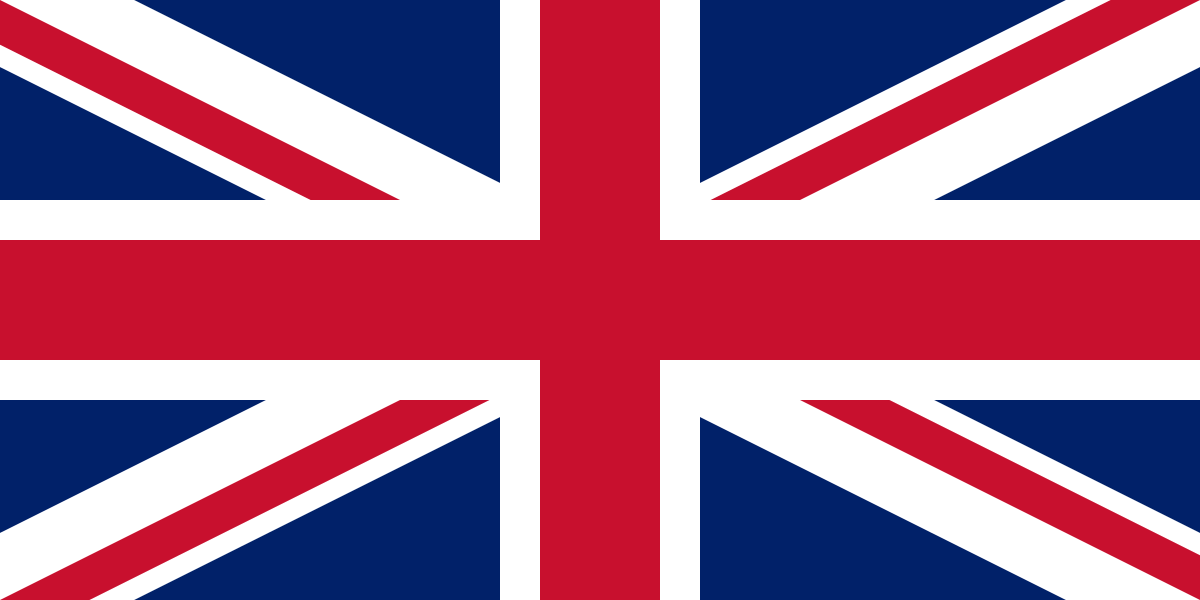

In [24]:
IPython.display.display(IPython.display.SVG(url=frag_url))